### Generate Dataset

In [70]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [71]:
X, Y = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, random_state=3, n_clusters_per_class=1)

In [72]:
X.shape, Y.shape

((400, 2), (400,))

In [73]:
print(Y)
Y[Y == 0] = -1 # Broadcasting
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]
[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1

[]

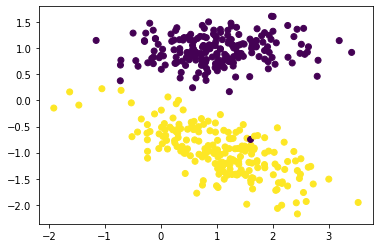

In [74]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot()

In [84]:
class SVM :
    
    def __init__(self, C=1) : # C is penalty for outliers
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y) :
        loss = 0.0
        
        loss += .5 * np.dot(W, W.T)
        
        m = X.shape[0]
        
        for i in range(m) :
            ti = Y[i] * (np.dot(W, X[i].T) + b) # W->1 x n, X[i]->1 x n
            loss += self.C * max(0, (1 - ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=500) :
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Initialise model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        # Initial loss
        # print(self.hingeLoss(W, bias, X, Y))
        
        # Training starts from here, update weight and bias
        losses = []
        
        for i in range(maxItr) :
            
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size) :
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in mini batch
                for j in range(batch_start, batch_start + batch_size) :
                    if j < no_of_samples :
                        i = ids[j]
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti > 1 :
                            gradw += 0
                            gradb += 0
                        else :
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                    
                W = W - n * W + n * gradw
                bias = bias + n * gradb
                
        self.W = W
        self.b = bias
        return W, bias, losses

In [147]:
mySVM = SVM(C=10)

In [148]:
W, b, losses = mySVM.fit(X, Y, maxItr=100)

(4000.0, 75.18058312813639)


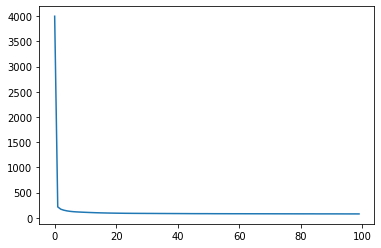

In [149]:
print((losses[0], losses[-1]))
plt.plot(losses)
plt.show()

In [150]:
print(W, b)

[[-0.77246134 -3.32443597]] 0.8700000000000003


In [151]:
def plotHyperplane(w1, w2, bias) :
    
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1 * x1 + b) / w2
    xp = -(w1 * x1 + b + 1) / w2
    xn = -(w1 * x1 + b - 1) / w2
    
    plt.figure(figsize=(12,12))
    plt.plot(x1, x2, label='Hyperplane WX+B=0')
    plt.plot(x1, xp, linestyle='dashed', label='+ve Hyperplane WX+B+1=0')
    plt.plot(x1, xn, linestyle='dashed', label='-ve Hyperplane WX+B-1=0')
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.legend()
    plt.show()

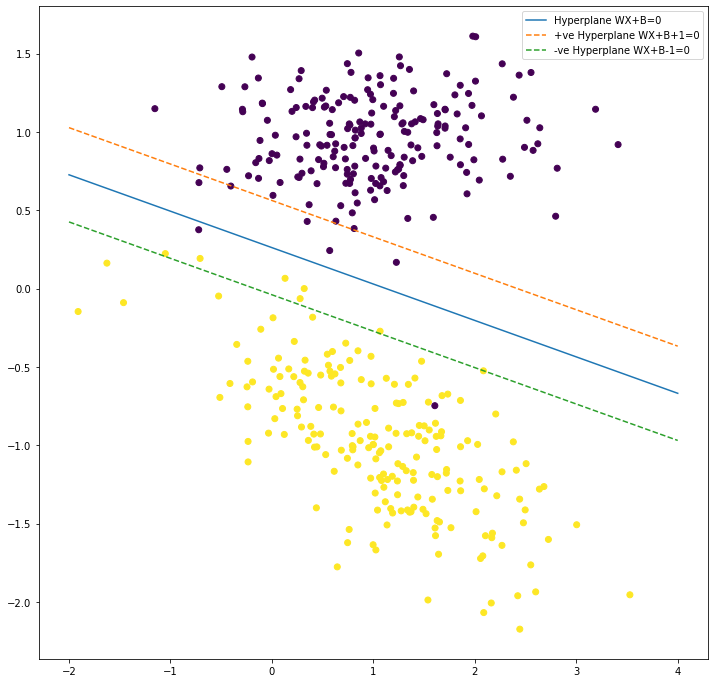

In [152]:
plotHyperplane(W[0, 0], W[0, 1], b)